**The goal is to predict whether or not a passenger survived based on attributes such as their age, sex, passenger class, where they embarked and so on.**

*Let's import necessary libraries and Data*








In [2]:
import pandas as pd
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from matplotlib import pyplot as plt
import seaborn as sns




*   trd = train_data
*   ted = test_data






In [3]:
trd = pd.read_csv("../input/titanic/train.csv")

In [4]:
ted = pd.read_csv("../input/titanic/test.csv")

In [5]:
trd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*Let's get more info to see how much data is missing:*

In [6]:
trd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*The age , cabin , embarked attributes are sometimes null (they are less than 891) in which cabin has most null values . The age attribute can be replaced with median ages*

*Let's vizualize the null Values*

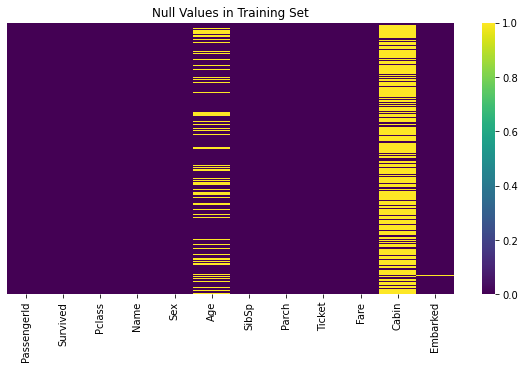

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(trd.isnull() , yticklabels = False , cmap='viridis')
plt.title('Null Values in Training Set');

In [8]:
trd.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*From the above table we can observe that only 38% has survived*

*Let's check the target*

In [9]:
trd["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of passengers Survived')

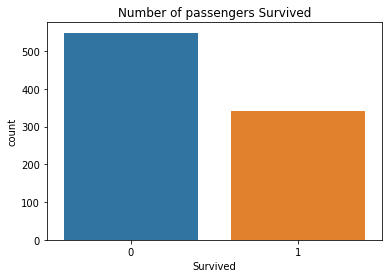

In [10]:
sns.countplot(trd.Survived)
plt.title(  "Number of passengers Survived")


*Number of passengers survived based on Gender*

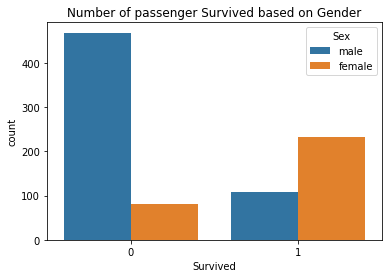

In [11]:
sns.countplot(x = "Survived" , hue = "Sex" , data = trd)
plt.title('Number of passenger Survived based on Gender');

*According to the above graph we have more number of non-survived people and females are more likely to survived than male!.*

*Now let's take a quick look at all the categorical attributes*

In [12]:
trd["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

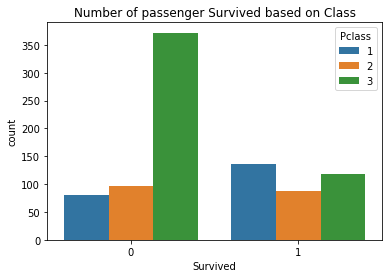

In [13]:
sns.countplot(x="Survived", hue="Pclass", data=trd)
plt.title('Number of passenger Survived based on Class');

In [14]:
pclass1 = trd[trd.Pclass == 1]['Survived'].value_counts(normalize=True).values[0]*100
pclass2 = trd[trd.Pclass == 2]['Survived'].value_counts(normalize=True).values[1]*100
pclass3 = trd[trd.Pclass == 3]['Survived'].value_counts(normalize=True).values[1]*100

print("There are " + str(pclass1 ) +"% of people survived from class 1" )
print("There are " + str(pclass2) +"% of people survived from class 2")
print("There are " + str(pclass3) +"% of people survived from class 3")

There are 62.96296296296296% of people survived from class 1
There are 47.28260869565217% of people survived from class 2
There are 24.236252545824847% of people survived from class 3


In [15]:
trd["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

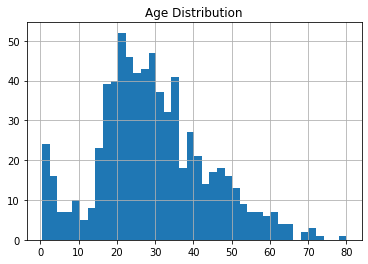

In [16]:
trd['Age'].hist(bins=40)
plt.title('Age Distribution');

*Age column has non-uniform data and many outliers*

*Let's  plot a univariate distribution of Age observations*

Text(10.049999999999997, 0.5, 'Frequency')

<Figure size 720x720 with 0 Axes>

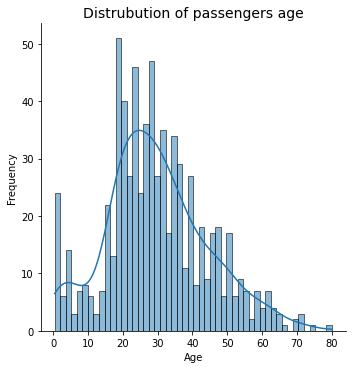

In [17]:
plt.figure(figsize=(10,10))
sns.displot(trd.Age, bins = 50,kde = True)
plt.title('Distrubution of passengers age',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')


*Age by surviving status*

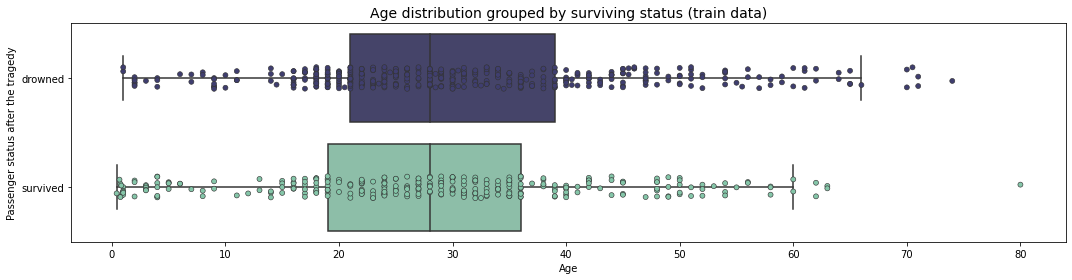

In [18]:
plt.figure(figsize=(15, 4))

sns.boxplot(y = 'Survived', x = 'Age', data = trd,
     palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')

sns.stripplot(y = 'Survived', x = 'Age', data = trd,
     linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')


plt.yticks( np.arange(2), ['drowned', 'survived'])
plt.title('Age distribution grouped by surviving status (train data)',fontsize= 14)
plt.ylabel('Passenger status after the tragedy')
plt.tight_layout()

**Now let's build our preprocessing pipelines.**

*Let's built a class called Dataframe Selector to select specific attributes from the DataFrame:*

In [19]:
class DataFrameSelector (BaseEstimator , TransformerMixin):
  def __init__(self , attribute_names):
    self.attribute_names = attribute_names
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    return X[self.attribute_names]

*Let's built pipeline for numerical attributes*

In [20]:
num_pipeline = Pipeline([("select_numeric" , 
                          DataFrameSelector(["Age" , "SibSp" 
                                             , "Parch" , "Fare"])) ,
                        ("imputer" , SimpleImputer(strategy="median"))])

In [21]:
num_pipeline.fit_transform(trd)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [22]:
trd

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


*As we can see the "Age" , "SibSp" , "Parch" , "Fare" columns has no null values . They were filled by median of their respective columns.*

*We will also need an imputer for the string categorical columns (the regular SimpleImputer does not work on those):*

In [23]:
class MostFrequentImputer(BaseEstimator,TransformerMixin):
  def fit(self,X,y = None):
    self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                    index = X.columns)
    return self
  def transform (self , X , y = None):
    return X.fillna(self.most_frequent_)


*Now we can build the pipeline for the categorical attributes:*

In [24]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [25]:
cat_pipeline.fit_transform(trd)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

*Finally, let's join the numerical and categorical pipelines :*

In [26]:
preprocess_pipeline = FeatureUnion(transformer_list=[
                          ("num_pipeline" , num_pipeline),
                          ("cat_pipeline" , cat_pipeline)
                                                     
])

In [27]:
X_train = preprocess_pipeline.fit_transform(trd)
X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [28]:
y_train = trd["Survived"]

*Let's train our data with stochastic Gradient descent classifier .*

In [29]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)


SGDClassifier(random_state=42)

In [30]:
 sgd_scores= cross_val_score(sgd_clf, X_train, y_train, cv=10, scoring="accuracy")


In [31]:
sgd_scores.mean()

0.6936704119850188

*oh No !!! It's too bad*

*Let's train our data with Random forest classifier .*

In [32]:
forest_clf = RandomForestClassifier(n_estimators=100 , random_state=42)

In [33]:
scores = cross_val_score(forest_clf , X_train , y_train , cv = 10)

In [34]:
scores.mean()

0.8126466916354558

*That's 81% accuracy . comment me if it is good*

*Let's try with some other classifiers*

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knclassifier = KNeighborsClassifier(n_neighbors=3)
knclassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
Kn_scores = cross_val_score(knclassifier , X_train, y_train , cv = 10 )
Kn_scores.mean()

0.7228464419475655

In [37]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=300)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=1)

In [38]:
mlp_scores = cross_val_score(mlp , X_train, y_train , cv = 10  )
mlp_scores.mean()

0.78458177278402

In [39]:
from sklearn.gaussian_process import GaussianProcessClassifier
gpc = GaussianProcessClassifier()
gpc.fit(X_train,y_train)

GaussianProcessClassifier()

In [40]:
gpc_scores = cross_val_score(gpc , X_train, y_train , cv = 10 )
gpc_scores.mean()

0.7306741573033707

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train , y_train)

DecisionTreeClassifier(random_state=0)

In [42]:
dtc_scores = cross_val_score(dtc , X_train, y_train , cv = 10 )
dtc_scores.mean()

0.7879151061173534

In [43]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [44]:
ada_scores =  cross_val_score(ada , X_train, y_train , cv = 10 )
ada_scores.mean()

0.812621722846442

*From the above all classifiers Random forest classifier and AdaBoostClassifier works quite well .*

*Instead of just looking at the mean accuracy across the 10 cross-validation folds, let's plot all 10 scores for each model, along with a box plot highlighting the lower and upper quartiles, and "whiskers" showing the extent of the scores*

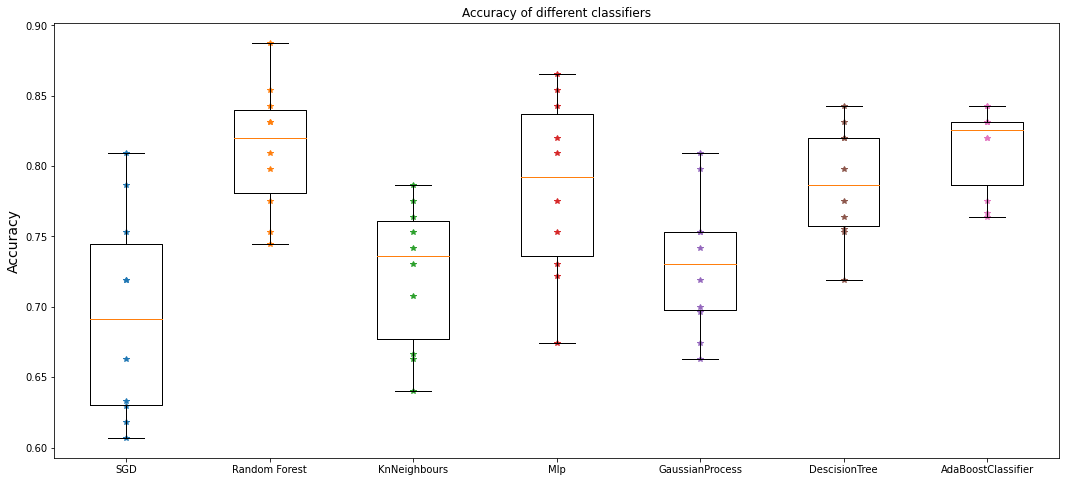

In [48]:
plt.figure(figsize=(18, 8))
plt.plot([1]*10, sgd_scores, "*")
plt.plot([2]*10, scores, "*")
plt.plot([3]*10, Kn_scores, "*")
plt.plot([4]*10, mlp_scores, "*")
plt.plot([5]*10, gpc_scores, "*")
plt.plot([6]*10, dtc_scores, "*")
plt.plot([7]*10, ada_scores, "*")
plt.boxplot([sgd_scores, scores , Kn_scores , mlp_scores , gpc_scores , dtc_scores , ada_scores],
            labels=("SGD","Random Forest","KnNeighbours","Mlp","GaussianProcess","DescisionTree" ,"AdaBoostClassifier"))
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy of different classifiers")
plt.show()

*As we can see Random forest classifier dominates the rest of them .*

*I hope it's useful Kindly upvote .*